Cyna Shirazinejad, 7/7/21

# Notebook 15: analyze scission-present ARPC3+ CCPs, 'zero' padding

outline:
* comparison of lifetimes of ARPC3+/- CCPs
* comparison of aligned intensities of ARPC3+/- CCPs

##### import all necessary Python modules

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image
from scipy import signal
import scipy.stats as stats
import seaborn as sns

analysis_metadata = np.load('analysis_metadata.npy', allow_pickle=True)
sys.path.append(analysis_metadata.item().get('path_notebook')+'/cmeAnalysisPostProcessingSimplified') # add custom Python scripts to the local path
import generate_index_dictionary
import return_track_attributes
import display_tracks
index_dictionary = generate_index_dictionary.return_index_dictionary()

# load files

In [3]:
experiment = 'ada_ck666_dmso'

In [4]:
path_outputs = analysis_metadata.item().get('path_outputs')

In [5]:
with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes', 'rb') as f:
    merged_results = pickle.load(f)  

    
sig_arpc3_dnm2_peak = merged_results['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_sig_arpc3_dnm2_peak = np.where(np.array(sig_arpc3_dnm2_peak)==1)[0]

ap2_lifetime_arpc3_negative = merged_results['ap2_lifetime_arpc3_negative']
ap2_lifetime_arpc3_positive = np.array(merged_results['ap2_lifetime_arpc3_positive'])[indices_sig_arpc3_dnm2_peak]

# load files for ck666 treated cells

In [6]:
experiment = 'ada_ck666_ck666'

In [7]:
path_outputs = analysis_metadata.item().get('path_outputs')

In [8]:
with open(path_outputs+'/dataframes/'+experiment+'_merged_ccp_attributes', 'rb') as f:
    merged_results_ck666 = pickle.load(f)  

    
sig_arpc3_dnm2_peak_ck666 = merged_results_ck666['significant_arpc3_at_dnm2_peak_arpc3_positive']
indices_sig_arpc3_dnm2_peak_ck666 = np.where(np.array(sig_arpc3_dnm2_peak_ck666)==1)[0]

ap2_lifetime_arpc3_negative_ck666 = merged_results_ck666['ap2_lifetime_arpc3_negative']
ap2_lifetime_arpc3_positive_ck666 = np.array(merged_results_ck666['ap2_lifetime_arpc3_positive'])[indices_sig_arpc3_dnm2_peak_ck666]

# merge amplitudes of different channels

In [9]:
x_lim = 130

In [10]:
channel_amplitudes_arpc3_negative = []

for i in range(len(merged_results['ch0_vectors_arpc3_negative'])):
    
    channel_amplitudes_arpc3_negative.append([merged_results['ch0_vectors_arpc3_negative'][i],
                                              merged_results['ch1_vectors_arpc3_negative'][i],
                                              merged_results['channel_0_1_separations_arpc3_negative'][i]])

channel_amplitudes_arpc3_positive = []

for i in range(len(merged_results['ch0_vectors_arpc3_positive'])):
    
    channel_amplitudes_arpc3_positive.append([merged_results['ch0_vectors_arpc3_positive'][i],
                                              merged_results['ch1_vectors_arpc3_positive'][i],
                                              merged_results['ch2_vectors_arpc3_positive'][i],
                                              merged_results['channel_0_1_separations_arpc3_positive'][i],
                                              merged_results['channel_0_2_separations_arpc3_positive'][i],
                                              merged_results['channel_1_2_separations_arpc3_positive'][i]])
    
channel_amplitudes_arpc3_positive = np.array(channel_amplitudes_arpc3_positive)[indices_sig_arpc3_dnm2_peak]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [11]:
channel_amplitudes_arpc3_negative_ck666 = []
for i in range(len(merged_results_ck666['ch0_vectors_arpc3_negative'])):
    channel_amplitudes_arpc3_negative_ck666.append([merged_results_ck666['ch0_vectors_arpc3_negative'][i],
                                              merged_results_ck666['ch1_vectors_arpc3_negative'][i],
                                              merged_results_ck666['channel_0_1_separations_arpc3_negative'][i]])

channel_amplitudes_arpc3_positive_ck666 = []
for i in range(len(merged_results_ck666['ch0_vectors_arpc3_positive'])):
    channel_amplitudes_arpc3_positive_ck666.append([merged_results_ck666['ch0_vectors_arpc3_positive'][i],
                                              merged_results_ck666['ch1_vectors_arpc3_positive'][i],
                                              merged_results_ck666['ch2_vectors_arpc3_positive'][i],
                                              merged_results_ck666['channel_0_1_separations_arpc3_positive'][i],
                                              merged_results_ck666['channel_0_2_separations_arpc3_positive'][i],
                                              merged_results_ck666['channel_1_2_separations_arpc3_positive'][i]])
    
channel_amplitudes_arpc3_positive_ck666 = np.array(channel_amplitudes_arpc3_positive_ck666)[indices_sig_arpc3_dnm2_peak_ck666]

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### comparing ARPC3+/- aligned intensities

In [12]:
%%capture
fig, (axes_0, axes_1) = plt.subplots(2, 1, dpi=500, figsize=(6,8), gridspec_kw=dict(height_ratios=[1,1]))

cohorts = [[min(ap2_lifetime_arpc3_negative), max(ap2_lifetime_arpc3_negative)]]

_, _, max_dnm2_cohort_indices_0 = display_tracks.plot_separated_cohorts([axes_0], 
                                                                         channel_amplitudes_arpc3_negative, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [], 
                                                                         ['AP2', 'DNM2'],
                                                                         ['m', 'g'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], [], [], []],
                                                                         horizontal_shift_index=[0, 1], 
                                                                         horizontal_shift=[-92, -92, -92])

_, _, max_dnm2_cohort_indices_1 = display_tracks.plot_separated_cohorts([axes_0], 
                                                                         channel_amplitudes_arpc3_negative_ck666, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1], 
                                                                         [], 
                                                                         ['AP2', 'DNM2'],
                                                                         ['m', 'g'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], [], [], []],
                                                                         horizontal_shift_index=[0, 1], 
                                                                         horizontal_shift=[-92, -92, -92])

cohorts = [[min(ap2_lifetime_arpc3_positive), max(ap2_lifetime_arpc3_positive)]]


offsets, num_in_cohort, max_dnm2_cohort_indices_2 = display_tracks.plot_separated_cohorts([axes_1], 
                                                                         channel_amplitudes_arpc3_positive, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])     

offsets, num_in_cohort, max_dnm2_cohort_indices_3 = display_tracks.plot_separated_cohorts([axes_1], 
                                                                         channel_amplitudes_arpc3_positive_ck666, 
                                                                         1, 
                                                                         cohorts, 
                                                                         [0, 1, 2], 
                                                                         [], 
                                                                         ['AP2', 'DNM2', 'ARPC3'],
                                                                         ['m', 'g', 'b'],
                                                                         line_cutoff_index=[],
                                                                         line_cutoff_regions=[[], [], []],
                                                                         horizontal_shift_index=[0, 1, 2], 
                                                                         horizontal_shift=[-90, -90, -90])     

shift_0 = max_dnm2_cohort_indices_0[0]
shift_1 = max_dnm2_cohort_indices_1[0]
shift_2 = max_dnm2_cohort_indices_2[0]
shift_3 = max_dnm2_cohort_indices_3[0]

In [13]:
len(channel_amplitudes_arpc3_negative), len(channel_amplitudes_arpc3_positive)

(402, 1006)

In [14]:
len(channel_amplitudes_arpc3_negative_ck666), len(channel_amplitudes_arpc3_positive_ck666)

(261, 580)

In [15]:
shift_0, shift_1, shift_2, shift_3

(94, 94, 96, 96)

[0]
[0]
[0]
[0]


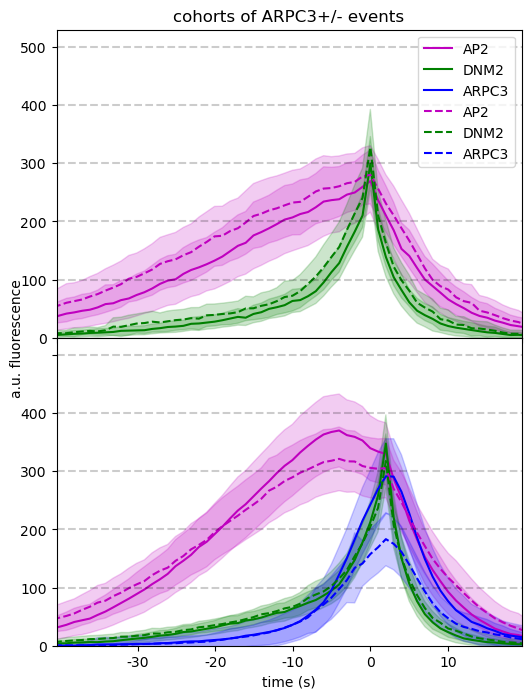

In [21]:
plt.style.use('default')
plt.rcParams['axes.spines.right'] = True

fig, (axes_0, axes_1) = plt.subplots(2, 1, dpi=100, figsize=(6,8), gridspec_kw=dict(height_ratios=[1,1]))


cohorts = [[min(ap2_lifetime_arpc3_negative), max(ap2_lifetime_arpc3_negative)]]

display_tracks.plot_separated_cohorts([axes_0], 
                                      channel_amplitudes_arpc3_negative, 
                                      1, 
                                      cohorts, 
                                      [0, 1], 
                                      [], 
                                      ['AP2', 'DNM2'],
                                      ['m', 'g'],
                                      line_cutoff_index=[],
                                      line_cutoff_regions=[[], [], [], [], []],
                                      horizontal_shift_index=[0, 1], 
                                      horizontal_shift=[-shift_0, -shift_0, -shift_0])

display_tracks.plot_separated_cohorts([axes_0], 
                                      channel_amplitudes_arpc3_negative_ck666, 
                                      1, 
                                      cohorts, 
                                      [0, 1], 
                                      [], 
                                      ['AP2', 'DNM2'],
                                      ['m', 'g'],
                                      line_cutoff_index=[],
                                      line_cutoff_regions=[[], [], [], [], []],
                                      horizontal_shift_index=[0, 1], 
                                      horizontal_shift=[-shift_0, -shift_0, -shift_0],
                                      linestyle='--')

cohorts = [[min(ap2_lifetime_arpc3_positive), max(ap2_lifetime_arpc3_positive)]]


display_tracks.plot_separated_cohorts([axes_1], 
                                      channel_amplitudes_arpc3_positive, 
                                      1, 
                                      cohorts, 
                                      [0, 1, 2], 
                                      [], 
                                      ['AP2', 'DNM2', 'ARPC3'],
                                      ['m', 'g', 'b'],
                                      line_cutoff_index=[],
                                      line_cutoff_regions=[[], [], []],
                                      horizontal_shift_index=[0, 1, 2], 
                                      horizontal_shift=[-shift_1, -shift_1, -shift_1])  

display_tracks.plot_separated_cohorts([axes_1], 
                                      channel_amplitudes_arpc3_positive_ck666, 
                                      1, 
                                      cohorts, 
                                      [0, 1, 2], 
                                      [], 
                                      ['AP2', 'DNM2', 'ARPC3'],
                                      ['m', 'g', 'b'],
                                      line_cutoff_index=[],
                                      line_cutoff_regions=[[], [], []],
                                      horizontal_shift_index=[0, 1, 2], 
                                      horizontal_shift=[-shift_1, -shift_1, -shift_1],
                                      linestyle='--')  


lines_0, labels_0 = axes_1.get_legend_handles_labels()

axes_0.legend(lines_0, labels_0, 
            loc='upper right')

y_lines = np.arange(0,600,100)

for i in range(1,len(y_lines)):
    
    axes_0.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)
    axes_1.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

axes_1.set_xlabel('time (s)') 
axes_0.set_xlim([-40, 20]) 
axes_1.set_xlim([-40, 20]) 
axes_0.set_ylim([0,530])
axes_1.set_ylim([0,530])

axes_1.set_yticks([0,100,200,300,400, 500], minor=False)
axes_1.set_yticklabels([0,100,200,300, 400, 500], minor=False)
axes_0.set_yticks([0,100,200,300,400, 500], minor=False)
axes_0.set_yticklabels([0,100,200,300,400, 500], minor=False)

plt.setp(axes_0.get_xticklabels(), visible=False)
yticks = axes_1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)


axes_0.text(-46,0, 'a.u. fluorescence', rotation="vertical", va="center", fontsize=10);

axes_1.set_xticks(0.5+np.array([-30, -20, -10, 0, 10]), minor=False)
axes_1.set_xticklabels([-30, -20, -10, 0, 10], minor=False)

axes_0.set_title('cohorts of ARPC3+/- events')

plt.savefig(path_outputs+'/plots/overlaid_dmso_ck666_aligned_intensities.png')